In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import methods_comparison

In [63]:
t = np.linspace(0, 200, 10000)
x = np.stack([np.sin(.25 * t), np.cos(t)])
y = stats.ortho_group.rvs(4)[:, :2].dot(x)
y += np.random.randn(*y.shape) / 2.
y -= y.mean(axis=1, keepdims=True)

In [64]:
u, s, vh = np.linalg.svd(y)
whiten = np.diag(1./s).dot(u.T)
yw = whiten.dot(y)
yp = np.diff(yw, axis=1)

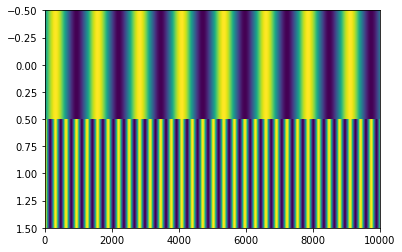

In [65]:
plt.imshow(x, aspect='auto')
plt.show()

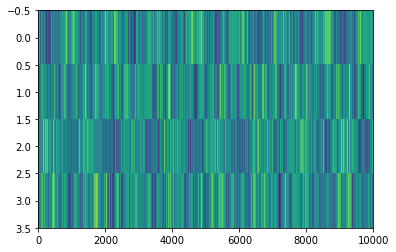

In [66]:
plt.imshow(y, aspect='auto')
plt.show()

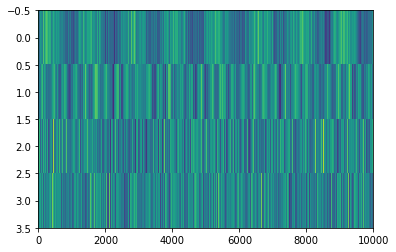

In [67]:
plt.imshow(yw, aspect='auto')
plt.show()

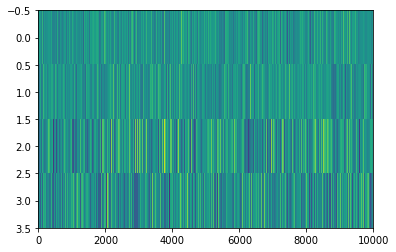

In [68]:
plt.imshow(yp, aspect='auto')
plt.show()

In [69]:
u, s, vh = np.linalg.svd(yp, full_matrices=False)
proj = u.T

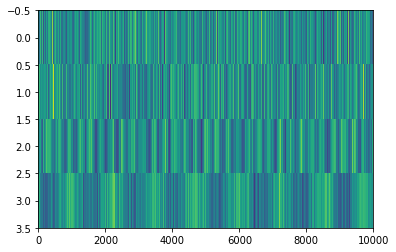

In [70]:
y_proj = proj.dot(whiten.dot(y))
plt.imshow(y_proj, aspect='auto')
plt.show()

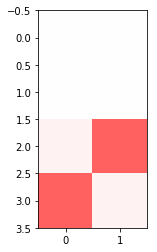

In [71]:
y_norm = y_proj - y_proj.mean(axis=1, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=1, keepdims=True)
x_norm = x - x.mean(axis=1, keepdims=True)
x_norm /= np.linalg.norm(x_norm, axis=1, keepdims=True)
corr = y_norm.dot(x_norm.T)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [72]:
corr

array([[7.26730584e-07, 1.12308338e-06],
       [3.95446345e-07, 2.50435539e-05],
       [4.71960250e-02, 6.18989352e-01],
       [6.18632253e-01, 4.74794211e-02]])

In [73]:
SFA = methods_comparison.SlowFeatureAnalysis(2)

In [74]:
y_est = SFA.fit_transform(y)

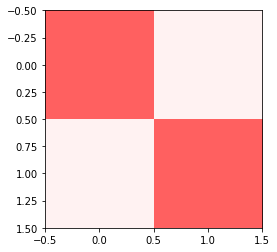

In [75]:
y_norm = y_est - y_est.mean(axis=1, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=1, keepdims=True)
corr = y_norm.dot(x_norm.T)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [76]:
corr

array([[0.61863225, 0.04747942],
       [0.04719603, 0.61898935]])